# Analisi risultati

Nel notebook vengono svolte alcune analisi sul dataset generato tramite varie
simulazioni su diversi dataset e utilizzando tre diversi classificatori. In
particolare sono stati usati una **SVM**, un **MultiLayer Perceptron** e un
**Random Forest**. Non sono stati effettuati benchmark sulle prestazioni, si
sta infatti considerando solo la qualità dei risultati ottenuti.


In [1]:
import pandas as pd

df = pd.read_csv("../datasets/test.csv")
df

,dataset_id,samples,features,classes,clusters,point,class,target,model,min_fitness,mean_fitness,max_fitness,accuracy
0,0,100,2,2,1,0,1,0,SVC,-0.856705,-0.689994,-0.530150,1.0
1,0,100,2,2,1,0,1,1,SVC,-0.208582,-0.110090,-0.002880,1.0
2,0,100,2,2,1,1,0,0,SVC,-0.114668,-0.056235,-0.000577,1.0
3,0,100,2,2,1,1,0,1,SVC,-0.582123,-0.517654,-0.473684,1.0
4,0,100,2,2,1,2,1,0,SVC,-1.055623,-1.001681,-0.954841,1.0
5,0,100,2,2,1,2,1,1,SVC,-0.176636,-0.095448,-0.000167,1.0
6,0,100,2,2,1,3,1,0,SVC,-0.911452,-0.834307,-0.760698,1.0
7,0,100,2,2,1,3,1,1,SVC,-0.181263,-0.095799,-0.000345,1.0
8,0,100,2,2,1,4,0,0,SVC,-0.224299,-0.121575,-0.000027,1.0
9,0,100,2,2,1,4,0,1,SVC,-1.394745,-1.349189,-1.314164,1.0


Ogni riga del dataset contiene quindi:

- **dataset_id**: ID univoco per ogni dataset analizzato.
- **point**: ogni punto del dataset viene semplicemente enumerato da $0$ a
  $N-1$, dove $N$ è il numero totale di punti del dataset.
- **class**: classe del punto.
- **target**: classe target dell'algoritmo genetico.
- **model**: il modello classificatore utilizzato.
- **min/mean/max_fitness**: valore minimo, medio e massimo di fitness estratti
  dalla hall of fame prodotta ad ogni esecuzione dell'algoritmo genetico.
- **accuracy**: calcolata come numero di individui nella hall of fame
  classificati nella classe target diviso numero di individui totali presenti
  nella hall of fame.

Possiamo quindi vedere ogni riga come una singola esecuzione dell'algoritmo
genetico su uno specifico punto e su una specifica classe target.

Dato che i valori di fitness non sono altro che la distanza di ogni punto
sintetico dal punto preso in esame, moltiplicata per $-1$. Possiamo quindi
convertire le tre colonne di fitness in valori di distanza rimoltiplicandole
per $-1$ di modo da avere valori meglio interpretabili.


In [5]:
df[["min_fitness", "mean_fitness", "max_fitness"]] *= -1.0
df.columns # change also columns name

,dataset_id,samples,features,classes,clusters,point,class,target,model,min_fitness,mean_fitness,max_fitness,accuracy
0,0,100,2,2,1,0,1,0,SVC,0.856705,0.689994,0.530150,1.0
1,0,100,2,2,1,0,1,1,SVC,0.208582,0.110090,0.002880,1.0
2,0,100,2,2,1,1,0,0,SVC,0.114668,0.056235,0.000577,1.0
3,0,100,2,2,1,1,0,1,SVC,0.582123,0.517654,0.473684,1.0
4,0,100,2,2,1,2,1,0,SVC,1.055623,1.001681,0.954841,1.0
5,0,100,2,2,1,2,1,1,SVC,0.176636,0.095448,0.000167,1.0
6,0,100,2,2,1,3,1,0,SVC,0.911452,0.834307,0.760698,1.0
7,0,100,2,2,1,3,1,1,SVC,0.181263,0.095799,0.000345,1.0
8,0,100,2,2,1,4,0,0,SVC,0.224299,0.121575,0.000027,1.0
9,0,100,2,2,1,4,0,1,SVC,1.394745,1.349189,1.314164,1.0


## Precisione

Come prima analisi possiamo andare a vedere i risultati ottenuti da ogni
modello, per ogni dataset in termini di accuracy.


In [2]:
df.groupby(["dataset_id", "model"]).agg(["mean", "std"])["accuracy"].reset_index()


,dataset_id,model,mean,std
0,0,MLPClassifier,1.0,0.0
1,0,SVC,1.0,0.0
2,1,MLPClassifier,1.0,0.0
3,1,SVC,1.0,0.0


Come possiamo notare abbiamo una media di $1.0$ e una deviazione standard
di $0.0$ come sperato. Deduciamo quindi che l'algoritmo genetico abbia prodotto
la popolazione sintetica finale sperata.

## Fitness

Vediamo ora se ci sono differenze signi

In [3]:
mean_fitness = df.groupby(["dataset_id", "model"]).mean()["mean_fitness"].reset_index()
mean_fitness

,dataset_id,model,mean_fitness
0,0,MLPClassifier,-0.478011
1,0,SVC,-0.487197
2,1,MLPClassifier,-0.541883
3,1,SVC,-0.547341


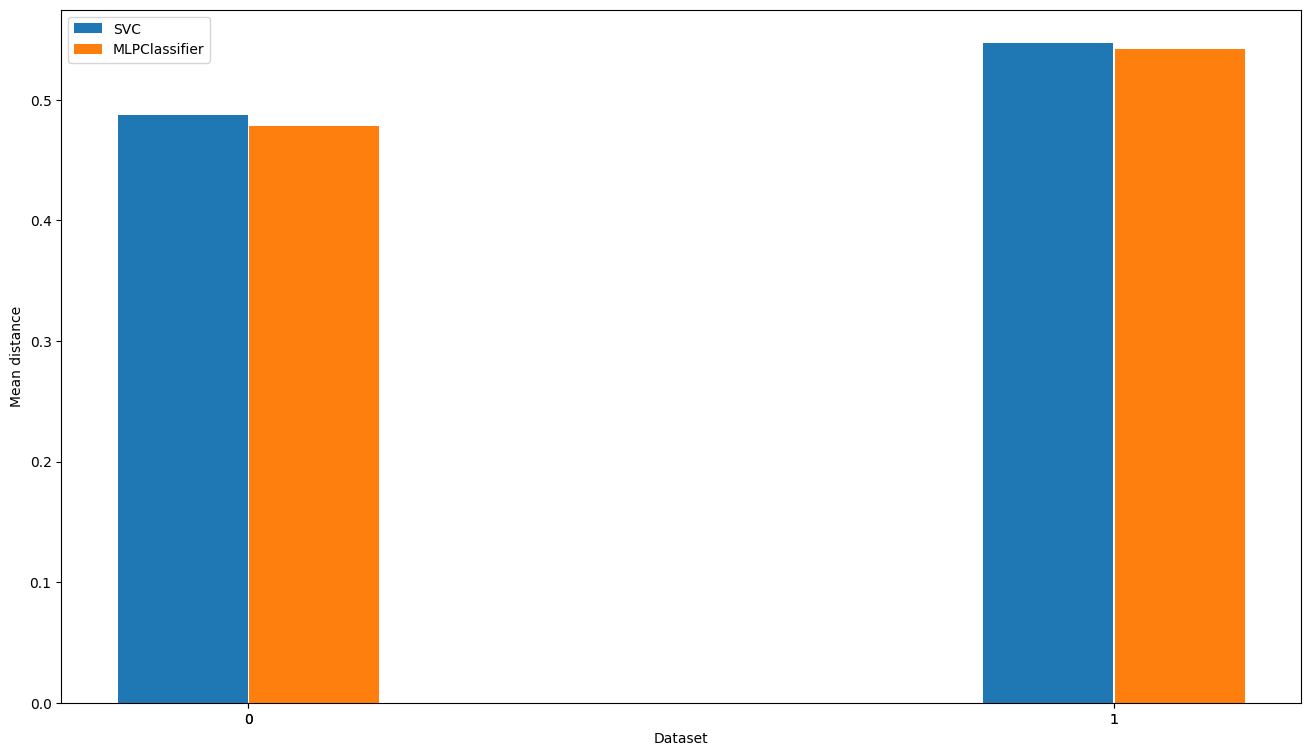

In [4]:
import matplotlib.pyplot as plt

svc = mean_fitness[mean_fitness["model"] == "SVC"]
mlp = mean_fitness[mean_fitness["model"] == "MLPClassifier"]

plt.figure(figsize=(16, 9))
plt.xticks(mean_fitness["dataset_id"])
plt.xlabel("Dataset")
plt.ylabel("Mean distance")

plt.bar(x=svc["dataset_id"] - 0.076, height=svc["mean_fitness"] * (-1.0), width=0.15, label="SVC")
plt.bar(x=mlp["dataset_id"] + 0.076, height=mlp["mean_fitness"] * (-1.0), width=0.15, label="MLPClassifier")

plt.legend()
plt.show()